In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import sys
sys.path.append(r'C:\Users\javid.shiriyev\Documents\respy')

In [3]:
from _grids import OneDimRecCuboid
from onephase._finite_difference import ImplicitSolver1D

# Creating Grids

In [4]:
grids = OneDimRecCuboid(4000,20000,100)

In [5]:
grids.set_permeability(100.)

In [6]:
grids.set_porosity(0.2)

# Fluid Properties

In [7]:
class fluid:
    def __init__(self,viscosity):
        """viscosity in cp"""
        self._viscosity = viscosity*0.001
    @property
    def viscosity(self):
        return self._viscosity/0.001

In [8]:
oil = fluid(5)

# Implicit Solution

In [9]:
sol = ImplicitSolver1D(grids,oil,1e-5)

In [10]:
sol.initialize(3000)
sol.set_Tvector()
sol.set_Tmatrix()
sol.set_Amatrix(dt=5)
sol.set_Jmatrix()
sol.set_Qvector(Pbound=1000)

In [11]:
Psol = sol.solve(10)

# Plotting Results

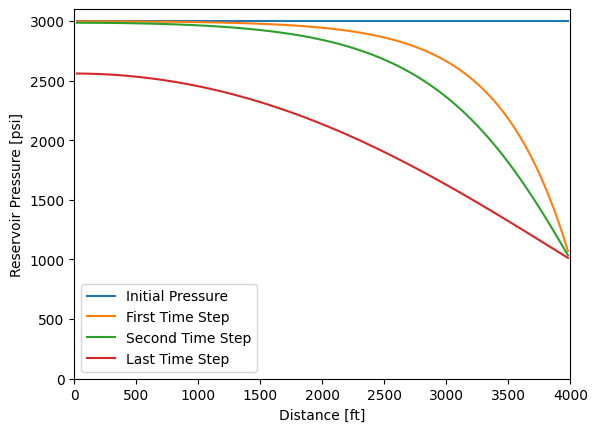

In [12]:
plt.plot(grids.xaxis,sol.pinit,label='Initial Pressure')
plt.plot(grids.xaxis,Psol[:,0],label='First Time Step')
plt.plot(grids.xaxis,Psol[:,1],label='Second Time Step')
plt.plot(grids.xaxis,Psol[:,-1],label='Last Time Step')

plt.xlim((0,4000))
plt.ylim(ymin=0)

plt.xlabel("Distance [ft]")
plt.ylabel("Reservoir Pressure [psi]")

plt.legend()

plt.show()